# Librerias y Configuraciones

In [1]:
import glob
from bs4 import BeautifulSoup
import os
import time
import datetime
from selenium import webdriver# I need to web scrap in chrome
from selenium.webdriver.support.select import Select # I need to select menu options
from random import randint
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

# Funciones

In [19]:
def TransNum(Texto):
    Salida=Texto.replace(",","")
    return Salida
def leerarchivo(lugar):
    archi=open(lugar)
    temp='we'
    cuadros=""
    while temp != '':#lee todo
        temp=archi.readline()
        cuadros=cuadros+temp
    archi.close()
    return cuadros
def leerColumna(archivo,Sufijo):
    b=leerarchivo(archivo)
    soup=BeautifulSoup(b)
    Columns = []
    temp=[]
    table = soup.find_all('table')
    table_body = table[2].find('thead')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        Columns= ['Age', 'Month', 'Site']+[ele for ele in cols if ele]
        for k in range(7,len(Columns)):
            Columns[k]=Columns[k]+Sufijo    
    return(Columns)
def leerData(archivo,Columns,patron):
        temp2=archivo.replace("./ele_com_096/Data/","").replace(".html","").split("_")
        b=leerarchivo(archivo)
        soup=BeautifulSoup(b)
        data = []
        temp=[]
        table = soup.find_all('table')
        #print(table[2])  
        table_body = table[2].find('tbody')
        rows = table_body.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            temp=[ele for ele in cols if ele]
            
            if 'ND' in set(temp[4:]) and len(set(temp[4:]))>1:
                data.append(temp2[:3]+temp)
        df = pd.DataFrame.from_records(data, columns=Columns)
        for ii in Columns[7:]:
            df[ii]=df[ii].apply(TransNum)
            df[ii]=pd.to_numeric(df[ii], errors='coerce')
        #df.info()
        df=df.drop(columns=['Variable Calculada', 'Total Residencial%s'%(patron),'Total No Residencial%s'%(patron)])
        return(df)
def SetPruebas(Data):
    Data.info()
    Data["Empresa"].value_counts()
def color_negative_red(val):
    if val < 0:
        color = 'red' 
    else:
        color ='black'
    
    return 'color: %s' % color 

def color_significant(val):
    if abs(val) > 0.3:
        color = 'yellow' 
    else:
        color = 'white' 
    return  'background-color: %s' % color 
def initSelenium():
    sistemaop = os.name
    if sistemaop=="posix":
        driver = webdriver.Chrome('./chromedriver')  # Optional argument, if not specified will search path.
    else: 
        driver = webdriver.Chrome('./chromedriver.exe')  # Optional argument, if not specified will search path.


# Descarga de datos

In [4]:
url="http://reportes.sui.gov.co/fabricaReportes/frameSet.jsp?idreporte=ele_com_096"
#initSelenium()
sistemaop = os.name
if sistemaop=="posix":
    driver = webdriver.Chrome('./chromedriver')  # Optional argument, if not specified will search path.
else: 
    driver = webdriver.Chrome('./chromedriver.exe')  # Optional argument, if not specified will search path.

for i in range(16,18):#Counter Age
    time_delay = randint(10,19)
    time.sleep(time_delay)
    driver.get(url)#Goto web
    dheader=driver.find_element_by_xpath("//*[@id='header']")#Search Head
    driver.switch_to.frame(dheader)#Manipulate Head
    inputElementi = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[1]/td[2]/select/option[%s]"%(str(i+1)))
    age=inputElementi.text
    for ii in range(3):
        inputElementii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[3]/td[2]/select/option[%s]"%(str(ii+1)))
        site=inputElementii.text
        for iii in [1,2,3]:
            inputElementiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[7]/td[2]/select/option[%s]"%(str(iii)))
            data=inputElementiii.text
            for iiii in range(12):
                try:
                    inputElementiiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[2]/td[2]/select/option[%s]"%(str(iiii+1)))
                    month=inputElementiiii.text
                    TEMP=age+"_"+month+"_"+site+"_"+data
                except:
                    continue
                try:
                    if os.path.exists("./ele_com_096/Data/"+TEMP+".html"):
                        print("Existe ./ele_com_096/Data/"+TEMP+".html")
                        time.sleep(1)
                        continue
                    nomonths=["Anual",'Trimestre 1','Trimestre 2','Trimestre 3','Trimestre 4','Semestre 1','Semestre 2']
                    if month in nomonths:
                        continue  
                    driver.get(url)
                    dheader=driver.find_element_by_xpath("//*[@id='header']")
                    driver.switch_to.frame(dheader)
                    inputElementi = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[1]/td[2]/select/option[%s]"%(str(i+1)))
                    inputElementi.click()
                    inputElementii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[3]/td[2]/select/option[%s]"%(str(ii+1)))
                    inputElementii.click()
                    inputElementiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[7]/td[2]/select/option[%s]"%(str(iii)))
                    inputElementiii.click()
                    inputElementiiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[2]/td[2]/select/option[%s]"%(str(iiii+1)))
                    inputElementiiii.click()
                    inputElement = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[2]")
                    time.sleep(time_delay+5)
                    
                    inputElement.click()
                    print(1)
                    inputElement = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[2]")
                    time.sleep(time_delay)
                    print(2)
                    Botonhtml= driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[4]")
                    Botonhtml.click()
                    print(3)
                    time.sleep(time_delay)
                    driver.switch_to.default_content()
                    dreport=driver.find_element_by_xpath("//*[@id='report']")
                    driver.switch_to.frame(dreport)
                    html = driver.page_source
                    file2 = open("./ele_com_096/Data/"+TEMP+".html","w+")
                    file2.write(html)
                    file2.close()
                    driver.switch_to.default_content()
                    dheader=driver.find_element_by_xpath("//*[@id='header']")
                    driver.switch_to.frame(dheader)
                except:
                    print(TEMP)

Existe ./ele_com_096/Data/2019_Enero_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Febrero_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Marzo_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Abril_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Mayo_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Junio_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Julio_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Agosto_Rural_Suscriptores.html
1
2
3
1
2
3
1
2
3
1
2
3
Existe ./ele_com_096/Data/2019_Enero_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Febrero_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Marzo_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Abril_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Mayo_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Junio_Rural_Consumo.html
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
Existe ./ele_com_096/Data/2019_Enero_Rural_Valor Consumo.html
Existe ./ele_com_096/Data/2019_Febrero_Rural_Valor 

# Stadistics DataBase

In [20]:
a=glob.glob("./ele_com_096/Data/*.html")
len(a)
iii=[]
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")#["./Data/2009_Enero_Rural_Suscriptores.html","./Data/2013_Enero_Rural_Suscriptores.html"]
cont3=len(SetData)
Total=cont3
for i in a:
    ii=i.replace("./ele_com_096/Data/","").replace(".html","").split("_")
    iii=iii+ii
iii=set(iii)
for i in iii:
    a=len(glob.glob("./ele_com_096/Data/*%s*.html"%(i)))
    print( "La etiqueta %s posee %s sets"%(i,a))
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
for i1 in SetData: 
    cont3=cont3-1
    for i2 in TypeData:
        i3=i1.replace("_Suscriptores",i2)
        if not os.path.isfile(i3):
            print(i3)
#Verifica Si hay archivos faltantes
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
archivosaeliminar=[]
for i in SetData:
    for j in TypeData:
        if not os.path.exists(i.replace("_Suscriptores",j)):
            archivosaeliminar.append(i)
print(set(archivosaeliminar))

La etiqueta 2018 posee 108 sets
La etiqueta 2012 posee 108 sets
La etiqueta Consumo posee 1278 sets
La etiqueta Suscriptores posee 639 sets
La etiqueta 2003 posee 108 sets
La etiqueta 2005 posee 108 sets
La etiqueta Diciembre posee 153 sets
La etiqueta 2011 posee 108 sets
La etiqueta 2009 posee 108 sets
La etiqueta 2014 posee 108 sets
La etiqueta Noviembre posee 153 sets
La etiqueta 2007 posee 108 sets
La etiqueta Julio posee 162 sets
La etiqueta Valor Consumo posee 639 sets
La etiqueta Abril posee 162 sets
La etiqueta 2006 posee 108 sets
La etiqueta 2016 posee 108 sets
La etiqueta Octubre posee 153 sets
La etiqueta 2004 posee 108 sets
La etiqueta Junio posee 162 sets
La etiqueta 2015 posee 108 sets
La etiqueta Rural posee 639 sets
La etiqueta Enero posee 162 sets
La etiqueta 2013 posee 108 sets
La etiqueta Urbano posee 639 sets
La etiqueta 2019 posee 108 sets
La etiqueta 2017 posee 108 sets
La etiqueta Febrero posee 162 sets
La etiqueta Mayo posee 162 sets
La etiqueta Agosto posee 162

# Carga de base de datos en Memoria

In [25]:
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")#["./Data/2009_Enero_Rural_Suscriptores.html","./Data/2013_Enero_Rural_Suscriptores.html"]
cont3=len(SetData)
Total=cont3
TiempoFin=0
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
cont2=0
TiempoInit=datetime.datetime.now()
for i1 in SetData:
    
    cont3=cont3-1
    cont=0
    for i2 in TypeData:
        i3=i1.replace("_Suscriptores",i2)
        Temp1=leerColumna(i3,i2)
        Tabla=leerData(i3,Temp1,i2)
        if cont==0:
            FinalT=Tabla
            cont=cont+1
        else:
            FinalT=FinalT.merge(Tabla,on=['Age', 'Month', 'Site', 'Departamento', 'Municipio', 'Empresa'], suffixes=("ty", "fg"))
            cont=cont+1
    if cont2==0:
        FinalM=FinalT
        cont2=cont2+1

    else:
        FinalM=pd.concat([FinalM, FinalT])
        cont2=cont2+1
    TiempoFin=datetime.datetime.now()
    if cont3 %25==0:
        Estimador=(TiempoFin-TiempoInit)*cont3/(Total-cont3)
        TiemporPorData=(TiempoFin-TiempoInit)/(Total-cont3)
        print(Estimador,cont3, datetime.datetime.now()+ Estimador)

0:00:00 0 2020-11-09 15:11:14.253378


In [34]:
FinalM.info()

In [8]:
FinalM.to_csv(path_or_buf="./DataSui.csv", sep=',', na_rep='',header=True, index=True, decimal='.')

In [4]:
FinalM = pd.read_csv(
    "./DataSui.csv",      # relative python path to subdirectory
    sep=',',           # Tab-separated value file.
    #quotechar="'",        # single quote allowed as quote character
    #dtype={"salary": int},             # Parse the salary column as an integer 
    #usecols=['name', 'birth_date', 'salary'].   # Only load the three columns specified.
    #parse_dates=['birth_date'],     # Intepret the birth_date column as a date
    #skiprows=10,         # Skip the first 10 rows of the file
    na_values=''      # Take any '.' or '??' values as NA
)

# Pruebas en base de datos

In [27]:
FinalM["Empresa"].value_counts()

ELECTRIFICADORA DEL CARIBE S.A. E.S.P.                                    228
VATIA S.A. E.S.P.                                                         153
ELECTRIFICADORA DEL HUILA S.A. E.S.P.                                      71
EMGESA S.A. E.S.P.                                                         51
ENERTOTAL S.A. E.S.P.                                                      46
DISTRIBUIDORA Y COMERCIALIZADORA DE ENERGIA ELECTRICA S.A. E.S.P.          40
EMPRESA DE ENERGIA DE CASANARE SA ESP                                      38
RENOVATIO TRADING AMERICAS SAS ESP                                         38
ELECTRIFICADORA DEL META S.A. E.S.P.                                       37
PROFESIONALES EN ENERGÍA S.A E.S.P                                         35
ELECTRIFICADORA DEL CAQUETA S.A. ESP                                       33
EMPRESA DISTRIBUIDORA DEL PACIFICO S.A. E.S.P                              32
CELSIA COLOMBIA S.A. E.S.P.                                     

In [28]:
FinalM["Departamento"].value_counts()

HUILA                 112
BOLIVAR                97
ATLANTICO              93
CORDOBA                91
META                   90
SUCRE                  77
MAGDALENA              67
CESAR                  66
CASANARE               60
VALLE DEL CAUCA        43
PUTUMAYO               42
CAQUETA                40
LA GUAJIRA             37
CHOCO                  35
ARAUCA                 24
CAUCA                  21
GUAVIARE                6
SANTANDER               4
BOGOTA, D.C.            2
BOYACA                  1
CUNDINAMARCA            1
TOLIMA                  1
ANTIOQUIA               1
NORTE DE SANTANDER      1
Name: Departamento, dtype: int64

In [29]:
FinalM["Municipio"].value_counts()

CARTAGENA DE INDIAS    21
YUMBO                  19
BARRANQUILLA           17
CALI                   17
VILLAVICENCIO          16
                       ..
SAN JACINTO             1
MORALES                 1
SAN MARTIN DE LOBA      1
EL MOLINO               1
LA ARGENTINA            1
Name: Municipio, Length: 335, dtype: int64

In [30]:
FinalM["Site"].value_counts()

Urbano            732
Rural             268
Centro Poblado     12
Name: Site, dtype: int64

In [31]:
FinalM["Month"].value_counts()

Junio    1012
Name: Month, dtype: int64

In [32]:
FinalM["Age"].value_counts()

2020    1012
Name: Age, dtype: int64

In [33]:
FinalM.describe()

Estrato 1_Suscriptores  Estrato 2_Suscriptores  Estrato 3_Suscriptores  \
count              490.000000              464.000000              364.000000   
mean              3348.234694             1361.534483              293.634615   
std               6444.912352             3734.942405             1065.972398   
min                  1.000000                1.000000                1.000000   
25%                638.250000              115.750000                4.000000   
50%               1466.500000              472.000000               16.000000   
75%               3973.250000             1319.500000              101.250000   
max             102737.000000            64698.000000            13887.000000   

       Estrato 4_Suscriptores  Estrato 5_Suscriptores  Estrato 6_Suscriptores  \
count              191.000000               38.000000               40.000000   
mean               105.764398              147.184211               56.250000   
std                390.576284              436.053608              156.378363   
min                  1.000000                1.000000                1.000000   
25%                  2.000000                1.000000                1.000000   
50%                  7.000000                3.000000                1.500000   
75%                 29.000000               15.500000                7.250000   
max               3053.000000             2217.000000              624.000000   

       Industrial_Suscriptores  Comercial_Suscriptores  Oficial_Suscriptores  \
count               567.000000              847.000000            512.000000   
mean                  7.294533              129.387249             23.636719   
std                  15.691922              425.178337             29.373778   
min                   1.000000                1.000000              1.000000   
25%                   1.000000                2.000000              9.000000   
50%                   3.000000               15.000000             17.000000   
75%                   7.000000               76.500000             28.000000   
max                 213.000000             5764.000000            281.000000   

       Otros_Suscriptores  Estrato 1_Consumo  Estrato 2_Consumo  \
count          454.000000       4.900000e+02       4.640000e+02   
mean            38.515419       5.905739e+05       2.535030e+05   
std            105.834009       1.548105e+06       7.966590e+05   
min              1.000000       1.200000e+01       0.000000e+00   
25%              3.000000       5.224238e+04       1.355800e+04   
50%             15.000000       1.579465e+05       6.436600e+04   
75%             37.000000       6.505679e+05       2.179068e+05   
max           1445.000000       2.571085e+07       1.303924e+07   

       Estrato 3_Consumo  Estrato 4_Consumo  Estrato 5_Consumo  \
count       3.640000e+02         191.000000          38.000000   
mean        5.710417e+04       22071.062827       35300.315789   
std         1.918735e+05       83295.207724      104300.114730   
min         0.000000e+00           0.000000           0.000000   
25%         8.980000e+02         253.500000         166.750000   
50%         3.029500e+03        1240.000000         971.500000   
75%         1.939550e+04        6456.500000        6054.500000   
max         1.998301e+06      744139.000000      553437.000000   

       Estrato 6_Consumo  Industrial_Consumo  Comercial_Consumo  \
count          40.000000        5.670000e+02       8.470000e+02   
mean        26399.900000        3.880013e+05       1.228434e+05   
std         68747.417059        1.863339e+06       4.173605e+05   
min             0.000000        0.000000e+00       0.000000e+00   
25%           291.750000        3.662500e+03       7.983500e+03   
50%           801.500000        2.472200e+04       2.334300e+04   
75%          6416.750000        1.405520e+05       6.920850e+04   
max        301839.000000        3.199479e+07       6.238386e+06   

       Oficial_Consumo 

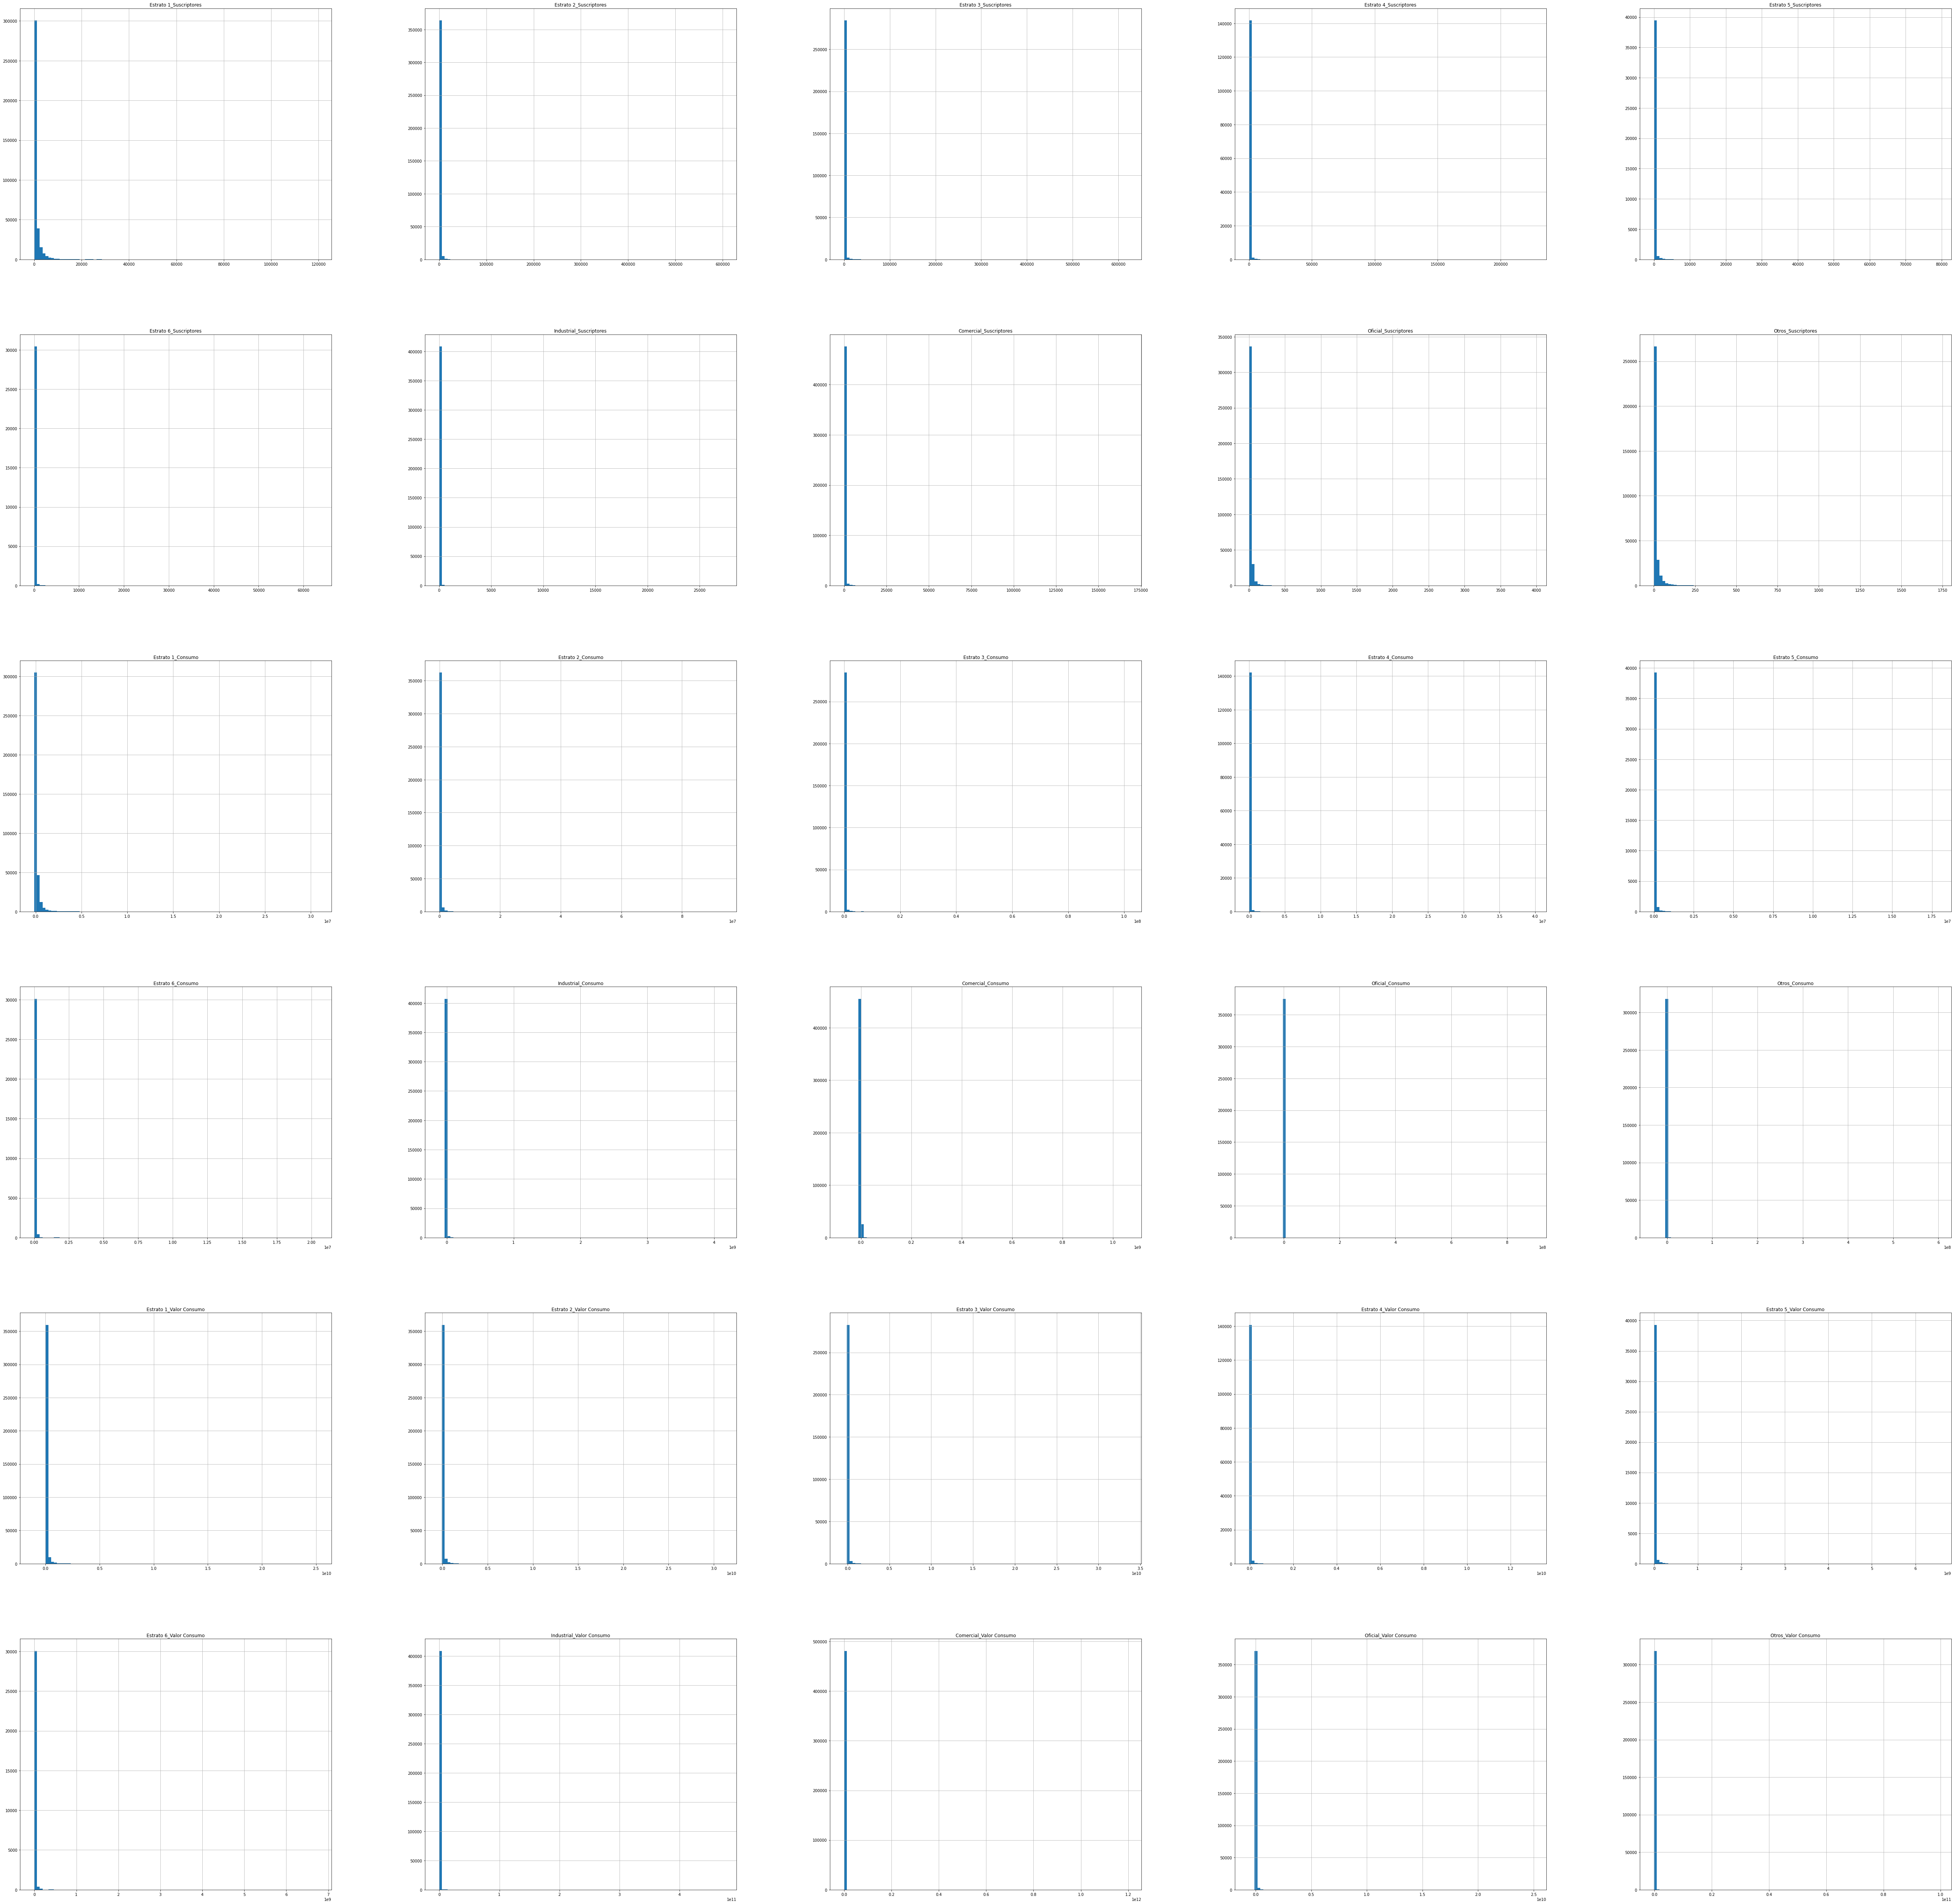

In [14]:
import matplotlib.pyplot as plt
FinalM.hist(bins=100, figsize=(90,90))
plt.savefig ('grafico01.png')

In [15]:
FinalM.corr(method="kendall" ).style.applymap(color_negative_red).applymap(color_significant)

# Exportar Base de datos

In [18]:
FinalM.to_csv('DataSui2.csv')

# Calculos Adicionales

In [9]:
for i in FinalM.columns[6:16]:
    ConsumoMedio=i.replace("_Suscriptores","_ConsumoMedio")
    FacturaMedia=i.replace("_Suscriptores","_FacturaMedia")
    TarifaMedia=i.replace("_Suscriptores","_TarifaMedia")
    Consumo=i.replace("_Suscriptores","_Consumo")
    ValorConsumo=i.replace("_Suscriptores","_ValorConsumo")
    FinalM[ConsumoMedio]=FinalM[Consumo]/V[i]
    FinalM[FacturaMedia]=FinalM[ValorConsumo]/V[i]
    FinalM[TarifaMedia]=FinalM[ValorConsumo]/(V[Consumo])

TypeError: unsupported operand type(s) for /: 'str' and 'float'

# Verificacion por Fila

In [22]:
len(FinalM)#.columns[6:16]
jkl=FinalM.iloc[5]
jkl

Unnamed: 0                                                                  5
Age                                                                      2010
Month                                                              Septiembre
Site                                                                   Urbano
Departamento                                               NORTE DE SANTANDER
Municipio                                                              TOLEDO
Empresa                     CENTRALES ELECTRICAS DEL NORTE DE SANTANDER S....
Estrato 1_Suscriptores                                                    112
Estrato 2_Suscriptores                                                   1301
Estrato 3_Suscriptores                                                    310
Estrato 4_Suscriptores                                                     12
Estrato 5_Suscriptores                                                    NaN
Estrato 6_Suscriptores                                          

# Analisis por municipio

In [17]:
V=FinalM#[FinalM["Municipio"]=="GUACARI"]
table = pd.pivot_table(V, index=['Age', 'Month', 'Site', 'Departamento', 'Municipio', 'Empresa'], values=['Estrato 1_Suscriptores', 'Estrato 2_Suscriptores',
       'Estrato 3_Suscriptores', 'Estrato 4_Suscriptores',
       'Estrato 5_Suscriptores', 'Estrato 6_Suscriptores',
       'Industrial_Suscriptores', 'Comercial_Suscriptores',
       'Oficial_Suscriptores', 'Otros_Suscriptores', 'Estrato 1_Consumo',
       'Estrato 2_Consumo', 'Estrato 3_Consumo', 'Estrato 4_Consumo',
       'Estrato 5_Consumo', 'Estrato 6_Consumo', 'Industrial_Consumo',
       'Comercial_Consumo', 'Oficial_Consumo', 'Otros_Consumo',
       'Estrato 1_Valor Consumo', 'Estrato 2_Valor Consumo',
       'Estrato 3_Valor Consumo', 'Estrato 4_Valor Consumo',
       'Estrato 5_Valor Consumo', 'Estrato 6_Valor Consumo',
       'Industrial_Valor Consumo', 'Comercial_Valor Consumo',
       'Oficial_Valor Consumo', 'Otros_Valor Consumo'],aggfunc=np.sum)
table2 = pd.pivot_table(V, index=['Age','Departamento', 'Municipio'], values=[ 'Comercial_Suscriptores',
       'Comercial_Consumo', 'Comercial_Valor Consumo'],aggfunc=np.sum)

In [37]:
table2

Comercial_Consumo  \
Age  Departamento    Municipio                                
2003 ANTIOQUIA       ABEJORRAL                    565599.00   
                     ABRIAQUI                      18658.00   
                     ALEJANDRIA                   141557.00   
                     AMAGA                       1395142.00   
                     AMALFI                       648824.00   
                     ANDES                       2253766.44   
                     ANGELOPOLIS                  163176.00   
                     ANGOSTURA                    169551.00   
                     ANORI                        214451.00   
                     ANZA                          84303.00   
                     APARTADO                   11896059.00   
                     ARBOLETES                   1016385.00   
                     ARGELIA                       88526.00   
                     ARMENIA                      652888.84   
                     BARBOSA                     2298561.87   
                     BELLO                      35542541.95   
                     BELMIRA                      283578.00   
                     BETANIA                      255939.00   
                     BETULIA                      470159.00   
                     BRICENO                       94216.00   
                     BURITICA                      68818.00   
                     CACERES                      943223.18   
                     CAICEDO                       89330.00   
                     CALDAS                      2859520.78   
                     CAMPAMENTO                        0.00   
                     CANASGORDAS                  327646.00   
                     CARACOLI                     233395.00   
                     CARAMANTA                    147697.00   
                     CAREPA                      1890059.00   
                     CAROLINA                     126723.50   
...                                                     ...   
2019 VALLE DEL CAUCA DAGUA                       1811394.00   
                     EL AGUILA                    153732.00   
                     EL CAIRO                     146932.00   
                     EL CERRITO                  2341489.00   
                     EL DOVIO                     247513.00   
                     FLORIDA                     2129001.00   
                     GINEBRA                     1035116.00   
                     GUACARI                      954857.00   
                     GUADALAJARA DE BUGA         2372972.00   
                     JAMUNDI                    11292257.00   
                     LA CUMBRE                    291019.00   
                     LA UNION                    2163842.00   
                     LA VICTORIA                  527597.00   
                     OBANDO                       376884.00   
                     PALMIRA                    47698614.00   
                     PRADERA                     1506850.00   
                     RESTREPO                     561901.00   
                     RIOFRIO                      496736.00   
                     ROLDANILLO                  2046325.00   
                     SAN PEDRO                    937820.00   
                     SEVILLA                     1882018.00   
                     TORO                         447725.00   
                     TRUJILLO                     315195.00   
                     TULUA                       4194003.00   
                     ULLOA                        173818.00   
                     VERSALLES                    192599.00   
                     VIJES                        593764.00   
                     YOTOCO                       993972.00   
                     YUMBO                       8478178.00   
                     ZARZAL                      2582886.00   

                                          Comercial_Suscriptores  \
Age 

In [36]:
table2["TarifaMedia"]=table2['Comercial_Valor Consumo']/(table2['Comercial_Consumo'])

In [38]:
table2.to_csv('Tarifas.csv')

In [16]:
FinalM

Age Month           Site     Departamento             Municipio  \
0     ./ele   com  096/Data/2016           NARINO            YACUANQUER   
1     ./ele   com  096/Data/2016           NARINO                TANGUA   
2     ./ele   com  096/Data/2016           NARINO           SAN LORENZO   
3     ./ele   com  096/Data/2016           NARINO  SAN ANDRES DE TUMACO   
4     ./ele   com  096/Data/2016           NARINO                 PASTO   
...     ...   ...            ...              ...                   ...   
1003  ./ele   com  096/Data/2012  VALLE DEL CAUCA               GUACARI   
1004  ./ele   com  096/Data/2012        ATLANTICO          BARRANQUILLA   
1005  ./ele   com  096/Data/2012        SANTANDER       BARRANCABERMEJA   
1006  ./ele   com  096/Data/2012           TOLIMA              AMBALEMA   
1007  ./ele   com  096/Data/2012        ANTIOQUIA                 AMAGA   

                                        Empresa  Estrato 1_Suscriptores  \
0     A.S.C INGENIERIA SOCIEDAD ANONIMA SA ESP.                     NaN   
1     A.S.C INGENIERIA SOCIEDAD ANONIMA SA ESP.                     NaN   
2     A.S.C INGENIERIA SOCIEDAD ANONIMA SA ESP.                     NaN   
3     A.S.C INGENIERIA SOCIEDAD ANONIMA SA ESP.                     NaN   
4     A.S.C INGENIERIA SOCIEDAD ANONIMA SA ESP.                     NaN   
...                                         ...                     ...   
1003                          VATIA S.A. E.S.P.                     NaN   
1004                          VATIA S.A. E.S.P.                     NaN   
1005                          VATIA S.A. E.S.P.                     NaN   
1006                          VATIA S.A. E.S.P.                     NaN   
1007                          VATIA S.A. E.S.P.                     NaN   

      Estrato 2_Suscriptores  Estrato 3_Suscriptores  Estrato 4_Suscriptores  \
0                        NaN                     NaN                     NaN   
1                        NaN                     NaN                     NaN   
2                        NaN                     NaN                     NaN   
3                        NaN                     NaN                     NaN   
4                       63.0                   148.0                    11.0   
...                      ...                     ...                     ...   
1003                     NaN                     NaN                     NaN   
1004                     NaN                     NaN                     2.0   
1005                     NaN                     NaN                     NaN   
1006                     NaN                     NaN                     NaN   
1007                     NaN                     NaN                     NaN   

      Estrato 5_Suscriptores  Estrato 6_Suscriptores  Industrial_Suscriptores  \
0                        NaN                     NaN                      NaN   
1                        NaN                     NaN                      1.0   
2                        NaN                     NaN                      NaN   
3                        NaN                     NaN                      NaN   
4                        NaN                     NaN                     13.0   
...                      ...                     ...                      ...   
1003                     NaN                     NaN                      1.0   
1004                     3.0                     NaN                      NaN   
1005                     NaN                     NaN                      1.0   
1006                     NaN                     NaN                      3.0   
1007                     NaN                     NaN                      1.0   

      Comercial_Suscriptores  Oficial_Suscriptores  Otros_Suscriptores  \
0                        1.0                   NaN                 1.0   
1                        NaN                   NaN                 NaN   
2                        NaN                   NaN